# PS1

In [224]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import scipy as spy
from scipy import linalg
from numpy import linalg

def g2_schmidt(mat):
    m,n = mat.shape
    mat = mat.astype(float)
    Q = np.matrix(np.copy(mat))
    R = np.matrix(np.zeros((n,n)))
    for i in range(n):
        R[i,i]= spy.linalg.norm(Q[:,i])
        Q[:,i] =  Q[:,i]/R[i,i]
        for j in range(i+1,n):
            X = Q[:,j]
            Y = X.T
            Z = Q[:,i]
            R[i,j]=  Y@Z
            Q[:,j] = X - R[i,j]*Z
    return Q,R

In [399]:
Y = np.random.rand(4,4)
M=np.array([1.0,1.0,0,1.0,0,1.0,0,1.0,1.0]).reshape(3,3)
def det_mat(X):
    return np.prod(np.diag(g2_schmidt(X)[1]))
det_mat(M)


0.7071067811865475
0.7071067811865475
0.40824829046386313


1.9999999999999998

In [468]:

def back_substitution(A, b):
    n = b.size
    x = np.zeros((n,1))
    x[n-1] = b[n-1] / A[n-1, n-1]
    for i in range(n-2, -1, -1):
        solv = b[i]
        for j in range(i+1, n):
            solv = solv - A[i,j] * x[j]
        x[i] = solv / A[i,i]
    return x


def solve_linear(A,b):
    Q,R = g2_schmidt(A)
    y = Q.T@b
    return back_substitution(R,y)

A=np.array( [2,3,4,9,-4,30,1,1,-1])
A =A.reshape((3,3))
A = np.matrix(A)
b =np.array([38,161,2])
b = np.matrix(b.reshape(3,1))


wer = solve_linear(A,b)
print(wer.tolist())


[[2.999999999999967], [4.000000000000005], [5.000000000000011]]


In [482]:
def Householder(A):
    m,n = A.shape
    R = np.copy(A)
    Q = np.eye(m)
    for k in range(n):
        u = np.copy(R[k:,k])
        sign = lambda x: 1 if  x >=0 else -1
        u[0]= u[0] + sign(u[0])*spy.linalg.norm(u)
        u = u/spy.linalg.norm(u)
        R[k:,k:] = R[k:,k:] - 2*np.outer(u, u.T@R[k:,k:])
        Q[k:,:] = Q[k:,:] - 2*np.outer(u, u.T@Q[k:,:])
    return Q.T,R

A = np.random.random((5, 3))
Q,R = spy.linalg.qr(A) # Get the full QR decomposition.
print(A.shape, Q.shape, R.shape)
np.allclose(Q @ R, A)

M,N = Householder(A)
print(A.shape, M.shape, N.shape)
np.allclose(M@N,A)

(5, 3) (5, 5) (5, 3)
(5, 3) (5, 5) (5, 3)


True

In [493]:
def Hessenberg(A):
    m,n = A.shape
    H = np.copy(A)
    Q = np.eye(m)
    for k in range(n-2):
        u = np.copy(H[k+1:,k])
        sign = lambda x: 1 if  x >=0 else -1
        u[0]= u[0] + sign(u[0])*spy.linalg.norm(u)
        u = u/spy.linalg.norm(u)
        H[k+1:,k:] = H[k+1:,k:] - 2*np.outer(u, u.T@H[k+1:,k:])
        H[:,k+1:] = H[:,k+1:] - 2*np.outer(H[:,k+1:]@u,u.T)
        Q[k+1:,:] = Q[k+1:,:] - 2*np.outer(u, u.T@Q[k+1:,])
    return H,Q.T

A = np.random.random((10, 10))
H,Q = spy.linalg.hessenberg(A, calc_q =True)

np.allclose(np.triu(H,-1),H)
HH,QQ = Hessenberg(A)
np.allclose(QQ@HH@QQ.T,A)

True

# PS2

In [41]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import scipy as spy
from scipy import linalg

def g2_schmidt(mat):
    m,n = mat.shape
    mat = mat.astype(float)
    Q = np.matrix(np.copy(mat))
    R = np.matrix(np.zeros((n,n)))
    for i in range(n):
        R[i,i]= spy.linalg.norm(Q[:,i])
        Q[:,i] =  Q[:,i]/R[i,i]
        for j in range(i+1,n):
            X = Q[:,j]
            Y = X.T
            Z = Q[:,i]
            R[i,j]=  Y@Z
            Q[:,j] = X - R[i,j]*Z
    return Q,R

def back_substitution(A, b):
    n = b.size
    x = np.zeros((n,1))
    x[n-1] = b[n-1] / A[n-1, n-1]
    for i in range(n-2, -1, -1):
        solv = b[i]
        for j in range(i+1, n):
            solv = solv - A[i,j] * x[j]
        x[i] = solv / A[i,i]
    return x


def solve_linear(A,b):
    Q,R = np.linalg.qr(A)
    y = Q.T@b
    return linalg.solve_triangular(R, y)

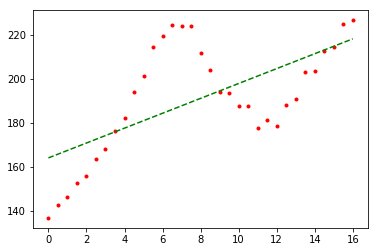

In [32]:
housing =  np.load("housing.npy")
Year = np.array(housing[:,0])
Index = np.array(housing[:,1])
one = np.ones(len(Year))
A = np.vstack((Year,one)).T
plt.plot(Year, Index,"r.")
Z = solve_linear(A, Index)
m = Z[0]*Year + Z[1]
plt.plot(Year, m ,"g--")

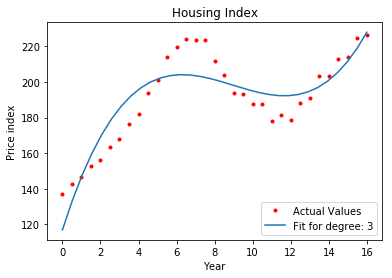

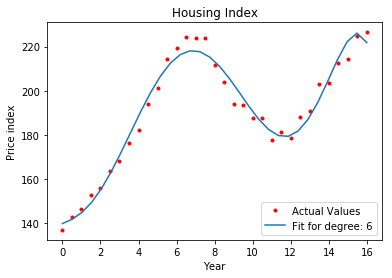

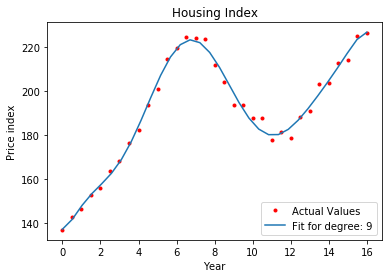

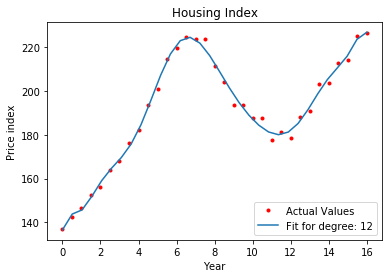

In [43]:
def polyfit(x,y, degree):
    A = np.vander(x, degree+1)
    least_s = solve_linear(A,y)
    poly  = np.poly1d(least_s)
    return least_s, poly

year_grid = np.linspace(0,16,32)
for i in[3,6,9,12]:
    plt.plot(Year, Index,'r.' ,label = "Actual Values")
    plt.plot(year_grid, polyfit(Year,Index, i)[1](year_grid), label = ("Fit for degree: " + str(i))  )
    plt.legend()
    plt.xlabel("Year")
    plt.ylabel("Price index")
    plt.title("Housing Index")
    plt.show()

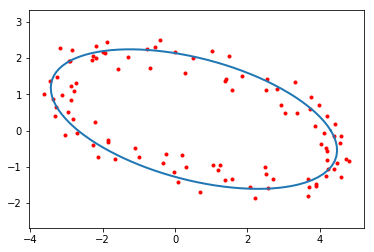

In [59]:
ellip = np.load("ellipse.npy")
ellip
x = ellip[:,0]
y = ellip[:,1]
b = np.ones_like(x)
A = np.column_stack((x**2,x,x*y,y,y**2))
solv = solve_linear(A,b)
    
def plot_ellipse(a, b, c, d, e):
    """Plot an ellipse of the form ax^2 + bx + cxy + dy + ey^2 = 1."""
    theta = np.linspace(0, 2*np.pi, 200)
    cos_t, sin_t = np.cos(theta), np.sin(theta)
    A = a*(cos_t**2) + c*cos_t*sin_t + e*(sin_t**2)
    B = b*cos_t + d*sin_t
    r = (-B + np.sqrt(B**2 + 4*A)) / (2*A)
    plt.plot(r*cos_t, r*sin_t, lw=2, label = "Best fit ellipse")
    plt.gca().set_aspect("equal", "datalim")

plt.plot(x,y,'r.')
plot_ellipse(solv[0],solv[1],solv[2],solv[3],solv[4])

In [92]:
import cmath
def dom_eig(A,N,tol):
    m,n = A.shape
    x= np.zeros((n,N+1))
    x[:,0]= np.random.random((n))
    x[:,0]= x[:,0]/spy.linalg.norm(x[:,0])
    iter = 0
    while iter <N:
        x[:,iter+1]= A@x[:,iter]
        x[:,iter+1] = x[:,iter+1]/spy.linalg.norm(x[:,iter+1])
        if spy.linalg.norm(x[:,iter+1]-x[:,iter])<tol:
            return x[:,iter+1].T@A@x[:,iter+1],x[:,iter+1]
        else:
            iter += 1
    return x[:,N].T@A@x[:,N],x[:,N]

A = np.random.random((4,4))
# Compute the eigenvalues and eigenvectors of A via SciPy.
eigs, vecs = la.eig(A)
loc = np.argmax(eigs)
lambo,xo = eigs[loc], vecs[:,loc]
print(lambo,xo)
lambc,xc = dom_eig(A,10000,1e-12)
print(lambc,xc)
# Verify that Ax = lambda x.
np.allclose(lambo * x, lambc * x)
        

(5.214646101141489+0j) [-0.27149724+0.j -0.34649235+0.j -0.37346307+0.j -0.36583256+0.j
 -0.22203553+0.j -0.29619377+0.j -0.18397129+0.j -0.38436164+0.j
 -0.30022891+0.j -0.3523875 +0.j]
5.214646101141477 [0.27149724 0.34649235 0.37346307 0.36583256 0.22203553 0.29619377
 0.18397129 0.38436164 0.30022891 0.3523875 ]


True

In [149]:
def qr_eigen(A,N,tol):
    m,n = A.shape
    S =  spy.linalg.hessenberg(A)
    for k in range(N):
        Q,R = spy.linalg.qr(S)
        S= R@Q
    eig =[]*n
    iter = 0
    while iter <n:
        if (iter == n-1 or np.abs(S[iter+1,iter])<tol):
            eig.append(S[iter,iter])
        else:
            a = S[i,i]
            b = S[i,i+1]
            c = S[i+1,i]
            d = S[i+1,i+1]
            A =1
            B = -1*(a+d)
            C = a*d-b*c
            root1 = (-B- cmath.sqrt(B**2- 4*A*C))/(2*A)
            eig.append(root1)
            root2 = (-B+ cmath.sqrt(B**2- 4*A*C))/(2*A)
            eig.append(root2)
        iter += 1
    return eig


A = np.random.random((2,2))
B =qr_eigen(A+A.T,1000,.001)
print(B)
Q = spy.linalg.eig(A+A.T)
print(Q[1])
Q[1][1]

[2.361024941869735, -0.2020939402895831]
[[ 0.90346535 -0.42866113]
 [ 0.42866113  0.90346535]]


array([0.42866113, 0.90346535])

# PS3

In [243]:
import cmath
def compact_svd(A,tol):
    m,n = A.shape
    lamb, V = spy.linalg.eig(A.conj().T@A)
    sigma =  np.sqrt(lamb)
    index =  np.argsort(sigma)
    index = index[::-1]
    sigma = sigma[index]
    V = V[:,index]
    r =  len(sigma[sigma!=0])
    sigma1 = sigma[:r]
    V1 = V[:,:r]
    U1 = np.zeros((m,r))
    for i in range(r):
        U1[:,i] = (A@V1[:,i])/(sigma1[i]) 
    sigma1 = sigma1*np.eye(r)
    return U1,sigma1,V1.conj().T

A = np.random.random((20,18))
B = compact_svd(A,1e-8)
print(B[1])
UI = spy.linalg.svd(A)
print(UI[1])

[[9.69466536+0.j 0.        +0.j 0.        +0.j 0.        +0.j
  0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j
  0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j
  0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j
  0.        +0.j 0.        +0.j]
 [0.        +0.j 2.15635893+0.j 0.        +0.j 0.        +0.j
  0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j
  0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j
  0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j
  0.        +0.j 0.        +0.j]
 [0.        +0.j 0.        +0.j 2.09759923+0.j 0.        +0.j
  0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j
  0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j
  0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j
  0.        +0.j 0.        +0.j]
 [0.        +0.j 0.        +0.j 0.        +0.j 2.03651273+0.j
  0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j
  0.        +0.j 0.        +0.j 0

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:15: ComplexWarning: Casting complex values to real discards the imaginary part
  from ipykernel import kernelapp as app


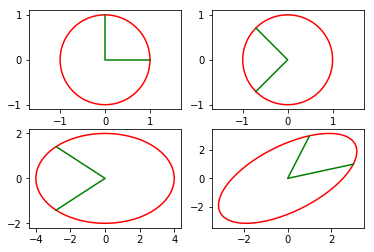

In [219]:
theta = np.linspace(0, 2*np.pi, 200)
cos_t, sin_t = np.cos(theta), np.sin(theta)
S = np.vstack([[cos_t],[sin_t]])
e1 = [1,0,0]
e2 = [0,0,1]
E = np.vstack((e1,e2))
A=  np.array([[3,1],[1,3]])
U,sigma,V_H = spy.linalg.svd(A)
sigma = sigma*np.eye(2)
# sigh = spy.linalg.inv(U)@A@spy.linalg.inv(V_H)
# print(sigh)
fig,ax = plt.subplots(2,2)
ax[0,0].plot(cos_t,sin_t,'r')
ax[0,0].plot(e1,e2,'g')
ax[0,0].axis("equal")

vs = V_H@S
es = V_H@E
ax[0,1].plot(vs[0],vs[1], 'r')
ax[0,1].plot(es[0],es[1], 'g')
ax[0,1].axis("equal")


sigvs =  sigma@V_H@S
siges = sigma@V_H@E
ax[1,0].plot(sigvs[0],sigvs[1], 'r')
ax[1,0].plot(siges[0],siges[1], 'g')
# ax[1,0].axis("equal")

a_s = A@S
e_s = A@E
ax[1,1].plot(a_s[0],a_s[1], 'r')
ax[1,1].plot(e_s[0],e_s[1], 'g')
# ax[1,1].axis("equal")

In [311]:
def trunc_svd(A,s):
    m,n = A.shape
    if s > np.linalg.matrix_rank(A) :
        raise ValueError("s has to be less than the rank of A")
    U,sigma,VH = spy.linalg.svd(A,1e-8)
    sigma = sigma*np.eye(np.linalg.matrix_rank(A))
    U_t = U[:,s] 
    sigma_t = sigma[:s,:s]
    VH_t = VH[:s,:]
    return U_t.size + np.sqrt(sigma_t.size) + VH_t.size

A = np.random.random((100,67))
print(type(A))
print(type(A[1,1]))
trunc_svd(A,15)

<class 'numpy.ndarray'>
<class 'numpy.float64'>


1120.0

In [288]:
def trunc_svd_mod(A,eps):
    m,n = A.shape 
    print(m,n)
    U,sigma,VH = compact_svd(A,1e-8)
    print(U.shape,sigma.shape,VH.shape)
    sig = np.sqrt(np.diag(sigma))
    print(np.min(sig))
    if eps  < np.min(sig):
        raise ValueError("tolerance value too low ")
    index = np.argmax(sig<eps)
    print(index)
    s = index
    U_t = U[:,s] 
    sigma_t = sigma[:s,:s]
    VH_t = VH[:s,:]
    return U_t.size + np.sqrt(sigma_t.size) + VH_t.size

A = np.random.random((100,67))
trunc_svd_mod(A,1.4)


100 67
(100, 67) (67, 67) (67, 67)
(0.7927913496840129+0j)
45


C:\Anaconda\lib\site-packages\ipykernel_launcher.py:15: ComplexWarning: Casting complex values to real discards the imaginary part
  from ipykernel import kernelapp as app


5140

In [262]:
A = np.random.random((10,1))
A = A-0.2
print(A)
print(np.min(A))
x = np.argmax(A<0)
print(x)

[[-0.11342153]
 [ 0.59926656]
 [ 0.33834803]
 [ 0.45831107]
 [ 0.55105871]
 [ 0.49640315]
 [-0.0397203 ]
 [ 0.16560276]
 [ 0.43923005]
 [-0.02248172]]
-0.11342153382251757
0


[[0.47843137 0.48235294 0.48627451 0.48627451 0.4745098  0.4627451
  0.44705882 0.43529412 0.41176471 0.41568627]
 [0.49411765 0.49019608 0.49411765 0.49803922 0.49019608 0.47843137
  0.46666667 0.45490196 0.45490196 0.45882353]
 [0.49411765 0.49803922 0.50196078 0.50588235 0.49411765 0.48627451
  0.47843137 0.47058824 0.48235294 0.48235294]
 [0.49019608 0.49019608 0.49411765 0.49411765 0.49411765 0.49019608
  0.48235294 0.47843137 0.47843137 0.48235294]
 [0.49411765 0.49803922 0.49803922 0.49803922 0.49803922 0.49411765
  0.49411765 0.49019608 0.48627451 0.49019608]
 [0.5254902  0.52156863 0.52156863 0.51764706 0.51764706 0.51372549
  0.51372549 0.50980392 0.51372549 0.51372549]
 [0.53333333 0.53333333 0.5254902  0.52156863 0.51764706 0.51764706
  0.51372549 0.51764706 0.51764706 0.52941176]
 [0.52941176 0.5254902  0.51764706 0.51372549 0.50980392 0.50588235
  0.50588235 0.51372549 0.51372549 0.52156863]
 [0.53333333 0.52156863 0.51372549 0.50196078 0.49803922 0.50588235
  0.51764706 

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:15: ComplexWarning: Casting complex values to real discards the imaginary part
  from ipykernel import kernelapp as app


reached here2
(1158, 20) (20, 20) (20, 1041)
20
reached here1
reached here2
(1158, 20) (20, 20) (20, 1041)
20
reached here1
reached here2
(1158, 20) (20, 20) (20, 1041)
(1158, 20) (20, 20) (20, 1041)


C:\Anaconda\lib\site-packages\ipykernel_launcher.py:38: ComplexWarning: Casting complex values to real discards the imaginary part


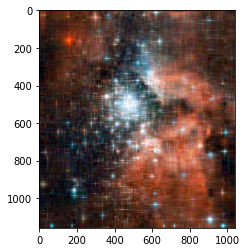

In [344]:
def trunc_svd(A,s):
    m,n = A.shape
    print(s)
    if s > np.linalg.matrix_rank(A) :
        raise ValueError("s has to be less than the rank of A")
    print("reached here1")
    U,sigma,VH = compact_svd(A,1e-8)
    print("reached here2")
    sigma = sigma*np.eye(np.linalg.matrix_rank(A))
    U_t = U[:,:s] 
    sigma_t = sigma[:s,:s]
    VH_t = VH[:s,:]
    print(U_t.shape,sigma_t.shape,VH_t.shape)
    size_t = U_t.size + np.sqrt(sigma_t.size) + VH_t.size
    return U_t,sigma_t,VH_t,size_t

def image_comp(s):
    image_h = plt.imread("hubble.jpg")/255
    print(image_h[:10,:10,0])
    if len(image_h)== 2:
        U,sigma,VH = trunc_svd(image_h,s)
    else:
        r = image_h[:,:,0]
        print(r.shape,s)
        g = image_h[:,:,1]
        b = image_h[:,:,2]
        print(type(s))
        print(type(r[1,1]))
        X = trunc_svd(r,s)
        Y = trunc_svd(g,s)
        Z = trunc_svd(b,s)
        print(X[0].shape,X[1].shape,X[2].shape )
        Ar =  X[0]@X[1]@X[2]
        Ag =  Y[0]@Y[1]@Y[2]
        Ab = Z[0]@Z[1]@Z[2]
        As = np.dstack((Ar,Ag,Ab))
        As = np.clip(As, 0, 1)
        B = As.astype(float)
        B = B*255
        B = B.astype(int)
        plt.imshow(B)
        

image_comp(20)